In [1]:
import numpy as np 
import matplotlib.pyplot as plt 

In [2]:
mean_1 = np.array([7,8])
mean_2 = np.array([2,-5])

In [3]:
cov_1 = np.array([[1,5], [5,1]])
cov_2 = np.array([[1,3], [3,1]])

In [4]:
dist_1 = np.random.multivariate_normal(mean_1, cov_1, size = 500)
dist_2 = np.random.multivariate_normal(mean_2, cov_2, size = 500)

C:\Users\varun\AppData\Local\Temp\ipykernel_10788\1626948445.py:1: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  dist_1 = np.random.multivariate_normal(mean_1, cov_1, size = 500)
C:\Users\varun\AppData\Local\Temp\ipykernel_10788\1626948445.py:2: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  dist_2 = np.random.multivariate_normal(mean_2, cov_2, size = 500)


In [5]:
dist_1.shape, dist_2.shape

((500, 2), (500, 2))

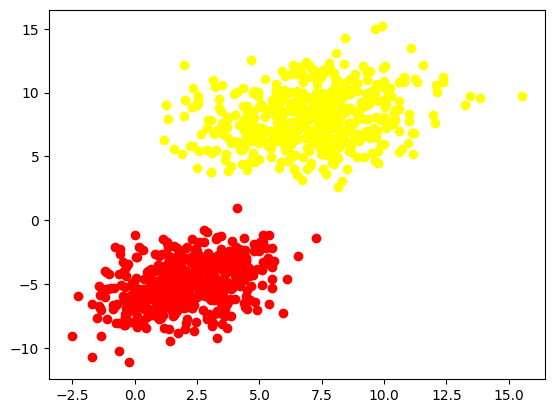

In [6]:
plt.scatter(dist_1[:, 0], dist_1[:, 1], c = "yellow")
plt.scatter(dist_2[:, 0], dist_2[:, 1], c = "red")

In [7]:
dataset = np.zeros((1000,3))
dataset[:500, :2] = dist_1
dataset[500:, :2] = dist_2

dataset[500:, -1] = 1

In [8]:
print(dataset[0])
print(dataset[-1])

[4.30689632 4.3846665  0.        ]
[ 2.58240658 -5.34355402  1.        ]


In [9]:
np.random.shuffle(dataset)

In [10]:
print(dataset[:10])

[[ 2.13913681 -5.19665246  1.        ]
 [ 8.48180369  6.98481742  0.        ]
 [ 6.37203174  9.27107637  0.        ]
 [ 2.02166074 -4.68816432  1.        ]
 [ 5.30419871  8.68342369  0.        ]
 [-0.5942037  -2.26372927  1.        ]
 [ 1.84318343 -5.86422369  1.        ]
 [ 1.87951088 -4.64131193  1.        ]
 [ 3.81390614 -2.38573338  1.        ]
 [ 4.66727543  6.76151436  0.        ]]


In [11]:
X_train = dataset[:800, :-1]
X_test = dataset[800:, :-1]

Y_train = dataset[:800, -1]
Y_test = dataset[800:, -1]

In [12]:
print(X_test.shape, X_train.shape, Y_test.shape, Y_train.shape)

(200, 2) (800, 2) (200,) (800,)


In [13]:
u = X_train.mean(axis = 0)
std = X_train.std(axis = 0)
X_train = (X_train - u)/std

In [14]:
u = X_test.mean(axis = 0)
std = X_test.std(axis = 0)
X_test = (X_test - u)/std

In [15]:
def hypothesis(X, theta):
    return 1/(1+ np.exp(-1*np.dot(X, theta)))

In [16]:
def loss_function(X, Y,theta):
    
    h_x = hypothesis(X, theta)
    loss = np.mean(Y*np.log(h_x) + (1-Y)*np.log((1-h_x)))

    return -1*loss

In [17]:
def gradient(X, Y, theta):

    h_x = hypothesis(X, theta)

    grad = np.dot(X.T, (Y - h_x))

    return grad/X.shape[0]

In [18]:
def grad_decent(X, Y, learing_rate = 0.03):

    weight = np.zeros((X.shape[1],))

    epoch = 6000

    cost = []

    for i in range(epoch):
        grad = gradient(X, Y, weight)

        loss = loss_function(X, Y, weight)
        cost.append(loss)

        weight = weight + learing_rate*grad
    return cost , weight

In [19]:
ones = np.ones((X_train.shape[0],1))
X_train = np.hstack((ones, X_train))

In [20]:
print(X_train[0])

[ 1.         -0.78188652 -0.99081649]


In [21]:
cost1 , theta1 = grad_decent(X_train, Y_train)

In [22]:
cost1

[0.6931471805599452,
 0.6819401235804051,
 0.6710280320796926,
 0.660402905797204,
 0.650056843786281,
 0.6399820567136018,
 0.6301708777461195,
 0.620615772080986,
 0.6113093451812104,
 0.6022443497854346,
 0.5934136917642356,
 0.5848104348979706,
 0.5764278046525093,
 0.568259191029414,
 0.5602981505663815,
 0.5525384075622148,
 0.5449738545983793,
 0.5375985524264583,
 0.5304067292876744,
 0.5233927797271876,
 0.5165512629622363,
 0.5098769008593991,
 0.5033645755724396,
 0.4970093268883722,
 0.4908063493256295,
 0.48475098902455277,
 0.4788387404668931,
 0.4730652430576336,
 0.46742627759923494,
 0.46191776268537793,
 0.4565357510384399,
 0.45127642581229355,
 0.44613609687956024,
 0.44111119712017893,
 0.43619827872606864,
 0.431394009534744,
 0.42669516940300817,
 0.4220986466302559,
 0.4176014344394875,
 0.4132006275228388,
 0.40889341865727064,
 0.4046770953950144,
 0.4005490368324442,
 0.3965067104602153,
 0.39254766909677763,
 0.38866954790672503,
 0.3848700615048724,
 0.3811

In [23]:
cost1[-1]

0.013469675479203884

In [24]:
print(theta1)

[-0.17560219 -1.69418923 -4.92076282]


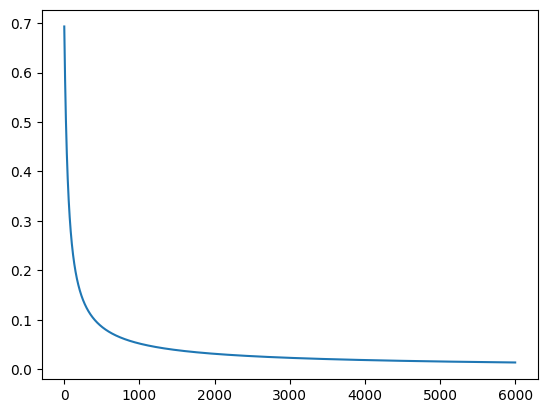

In [25]:
plt.plot(cost1)

In [26]:
x = np.arange(-2,13)
y = (theta1[1]*x + theta1[0])/theta1[2]

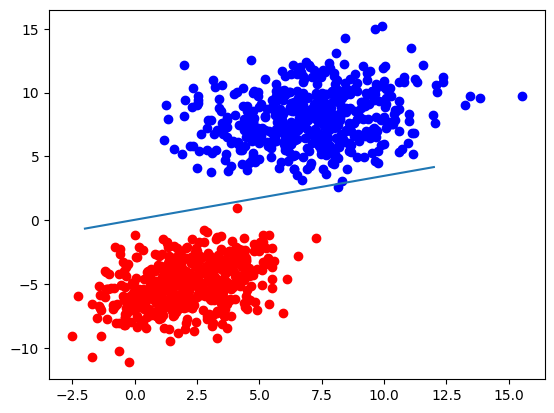

In [27]:
plt.scatter(dist_1[:, 0], dist_1[:, 1], c = "blue")
plt.scatter(dist_2[:, 0], dist_2[:, 1], c = "red")
plt.plot(x,y)

In [28]:
def sigmoid(X):
    return 1/(1+ np.exp(-X))

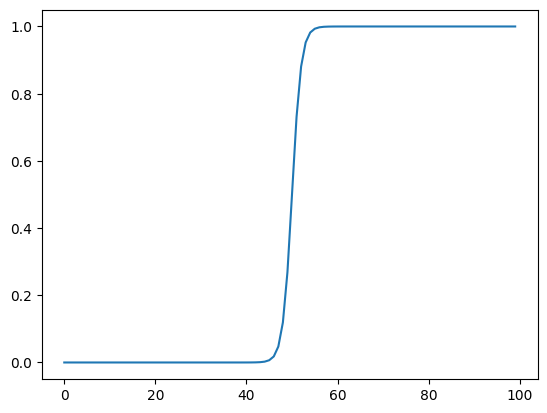

In [29]:
plt.plot(sigmoid(np.arange(-50,50)))

In [30]:
ones2 = np.ones((X_test.shape[0],1))
X_test = np.hstack((ones2, X_test))

In [31]:
def predict(X, theta):
    h_x = hypothesis(X, theta)

    if (h_x >= 0.5):
        return 1
    else:
        return 0

In [32]:
y_pred_train =  predict(X_train[0], theta1)

In [33]:
y_pred_train, Y_train[0]

(1, 1.0)

In [34]:
corr = 0
for i in range(X_test.shape[0]):
    pred = predict(X_test[i], theta1)
    if pred == Y_test[i]:
        corr += 1
print(corr/X_test.shape[0])

1.0
